# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [1]:
if False:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm torch torchvision

In [2]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

Let's denothe with $p_i$ the probability $h_\theta(x^i)= \mathbb{P}(y^i=1|x^i;\theta)$ and with $g(t)$ the sigmoid function $\frac{1}{1+e^{-t}}$

- **Likelihood**: 
\begin{align*}
    L(\theta) &= \mathbb{P}(y| x; \theta) = \prod_{i=1}^m \mathbb{P}(y^i | x^i; \theta) = \prod_{i=1}^m (p_i)^{y^i} \cdot (1-p_i)^{1-y^i} = \\
              &= \prod_{i=1}^m \big(h_\theta(x^i)\big)^{y^i} \cdot \big(1-h_\theta(x^i)\big)^{1-y^i}
\end{align*}

- **Log-Likelihood**: 

\begin{align*}
    l(\theta) &= \log(L(\theta)) = \sum_{i=1}^m \log\Big(\big(h_\theta(x^i)\big)^{y^i} \cdot \big(1-h_\theta(x^i)\big)^{1-y^i}\Big) = \\
              &= \sum_{i=1}^m \log\Big(\big(h_\theta(x^i)\big)^{y^i}\Big) +  \log\Big(\big(1-h_\theta(x^i)\big)^{1-y^i}\Big) = \\
              &= \sum_{i=1}^m y^i \cdot \log\big(h_\theta(x^i)\big) +  (1-y^i) \cdot \log\big(1-h_\theta(x^i)\big)
\end{align*}

- **Gradient of log-likelihood** (slide 5 p. 20); 
using the chain rule and nothing that: 
\begin{align*}
    \frac{\delta h_\theta(x)}{\delta \theta_j} &= h_\theta(x)\cdot \big( 1 - h_\theta(x) \big) \cdot x_j
\end{align*}
we get: 
\begin{align*}
    \frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i=1}^m y^i \cdot \frac{\delta}{\delta \theta_j} \log\big(h_\theta(x^i)\big) +  (1-y^i) \cdot \frac{\delta}{\delta \theta_j} \log\big(1-h_\theta(x^i)\big) = \\
                                             &= \sum_{i=1}^m y^i \cdot \frac{h_\theta(x^i)\cdot \big( 1 - h_\theta(x^i) \big)}{h_\theta(x^i)} \cdot x_j^i - (1-y^i) \cdot \frac{h_\theta(x^i)\cdot \big( 1 - h_\theta(x^i) \big)}{1 - h_\theta(x^i)} \cdot x_j^i = \\
                                             &= \sum_{i=1}^m y^i \cdot \big( 1 - h_\theta(x^i) \big) \cdot x_j^i - (1-y^i) \cdot h_\theta(x^i) \cdot x_j^i = \\
                                             &= \sum_{i=1}^m y^i \cdot x_j - h_\theta(x^i) \cdot x_j = \sum_{i=1}^m \big(y^i - h_\theta(x^i)\big) \cdot x_j
\end{align*}

- **Gradient update equation**: 
For  $j=0,...,n$:
\begin{equation}
    \theta_j = \theta_j + \alpha \cdot \sum_{i=1}^m \big(y^i - h_\theta(x^i)\big) \cdot x_j
\end{equation}
where $\alpha$ is the learning rate. 

-------------------------------------------------------

### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters. 
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [3]:
from libs.models import LogisticRegression
from libs.optim import fit

**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [4]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

Error:  0.031996098220603564


#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [5]:
data = pd.read_csv("assets/train.csv")
data.head()

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
3,158,Biscoe,NaN,Gentoo,28.18,20.59,220.22,4235.40
4,254,Dream,MALE,Chinstrap,25.38,25.22,233.34,5732.33


We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/> 

In [6]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values

It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [7]:
##############################################
# Save the unnormalized version for further use
X_unnormalized = X
# Get the mean and the standard deviation
mean, std = X.mean(), X.std()
# Subtract the mean and divide by std to normalize
X_normalized = (X - mean) / std
##############################################
X = X_normalized

We add a column of 1's to $X$ to take into account the intercept.

In [8]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]] 
X

,bias,bill_length,body_mass
0,1,0.444021,-0.748712
1,1,1.022341,-0.507442
2,1,-0.374306,-0.411786
5,1,0.437241,0.633610
6,1,-1.496369,0.577329
...,...,...,...
196,1,0.808777,0.192532
197,1,-0.790588,-0.315580
198,1,-1.428571,0.093969
199,1,0.788437,-0.037037


#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [9]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


Text(0.5, 0, 'Iterations')

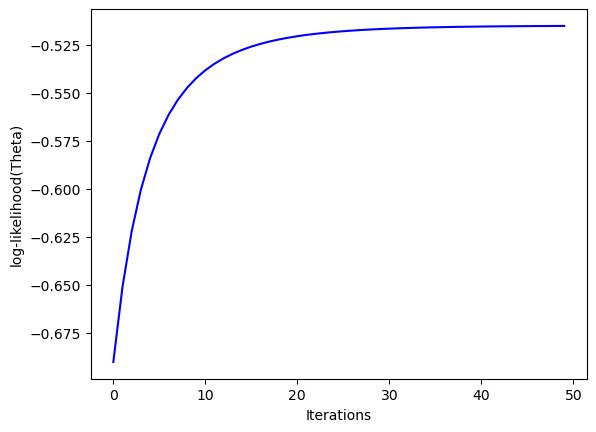

In [10]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

(-2.4624306915019663, 2.572482571797442)

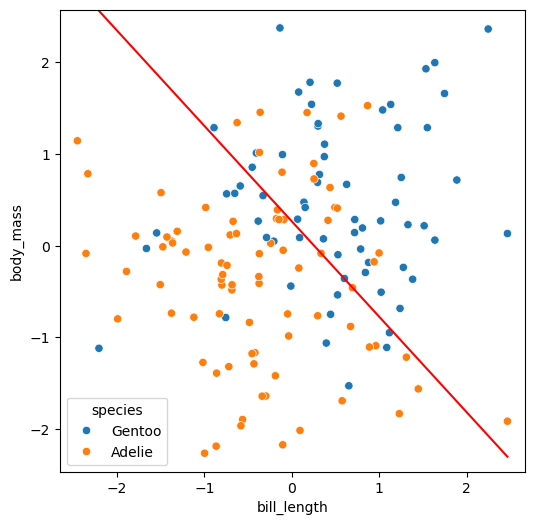

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

In [12]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

Accuracy: 0.7615894039735099


### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?


-------------------------------------------------------

**Question 1.** <br>
*Are we looking for a local minimum or a local maximum using the gradient ascent rule?*

**Answer 1.** <br>
Using gradient ascent, we are looking for local maximum because, with parameters update, we are trying to maximize the log likelihood function.

**Question 2.** <br>
*You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?*

**Answer 2.** <br>
Yes, we can implement gradient descent instead of gradient ascent for the proposed problem. 
To do so, we would minimize the negative log-likelihood instead of maximizing the log-likelihood. 


\begin{align*}
\text{negative log-likelihood} = -l(\theta) &= -\sum_{i=1}^m \log\Big(\big(h_\theta(x^i)\big)^{y^i} \cdot \big(1-h_\theta(x^i)\big)^{1-y^i}\Big) = \\ &= -\sum_{i=1}^m y^i \cdot \log\big(h_\theta(x^i)\big) +  (1-y^i) \cdot \log\big(1-h_\theta(x^i)\big)
\end{align*}

The gradient descent update rule is then written as:

\begin{align*}
\theta = \theta - \alpha \nabla (\text{negative log-likelihood})= \theta - \alpha \nabla(-l)
\end{align*}

Since $\nabla(-l) = -\nabla(l)$, the update rule effectively becomes:

\begin{align*}
\theta = \theta + \alpha \nabla(l)
\end{align*}

This shows that the parameter update remains consistent in form; the switch to minimizing the negative log-likelihood is just a change in perspective, as maximizing the log-likelihood and minimizing the negative log-likelihood are equivalent operations.

**Question 3.** <br>
*Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?*

**Answer 3.** <br>
We carried out various tests on same set of parameters. 

By changing the learning rate values ​​and the number of steps, we noticed that, even in the presence of a minimum learning rate, such as *lr = 0.001*, and a low number of steps, such as *num_steps = 10*, the **decision boundary remains stable and the accuracy is always above the 0.7 threshold**. <br>

In our opinion, this is due to the fact that, even without training, **we find ourselves very close to the local maxima**, which is around -0.52, in fact the value of the initial log likelihood is -0.66, therefore even carrying out mild training with lr = 0.001 and num_steps = 10, the resulting decision boundary is still sufficient.

Anyway, in a generic situation, the **learning rate** and **number of steps** are crucial hyperparameters that govern the optimization process. When these parameters are appropriately set, the algorithm can converge close to the optimum. However, poorly chosen values may lead to inconclusive or inefficient execution of the algorithm.

- **Learning Rate:** controls how quickly the algorithm moves toward the maximum (or minimum). 
It must be carefully balanced:  
    - A **high learning rate** may cause the algorithm to fail to converge or even diverge. This happens because the parameters can oscillate wildly or move too far in the wrong direction, leading the objective function to decrease (in gradient ascent) or increase (in gradient descent) instead of optimizing.  
    - A **low learning rate** can result in slow convergence, as each step makes minimal progress. In extreme cases, the algorithm might get stuck or fail to improve meaningfully.

- **Number of Steps:**  
  The number of steps determines how many iterations the algorithm performs.  
    - A sufficiently **high number of steps** allows the algorithm to refine the parameters and get closer to the maximum (or minimum).  
    - A **low number of steps** might halt the process prematurely, leaving the solution under-optimized and far from the desired result.

Example of too high learning rate

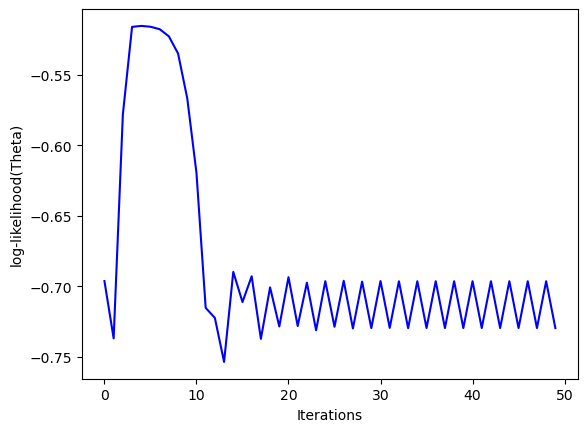

In [13]:
np.random.seed(1)

# Initialize the model
highLR_model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
another_log, _ = fit(highLR_model, X, y, lr=15, num_steps=n_iter)

plt.plot(range(len(another_log)), another_log, "b")

plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")
plt.show()

Example of too low learning rate

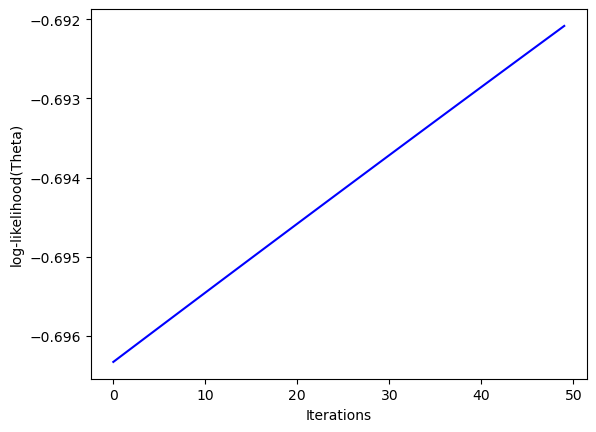

In [14]:
np.random.seed(1)

# Initialize the model
lowLR_model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
another_log, _ = fit(lowLR_model, X, y, lr=0.001, num_steps=n_iter)

plt.plot(range(len(another_log)), another_log, "b")

plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")
plt.show()

Example of too low number of steps

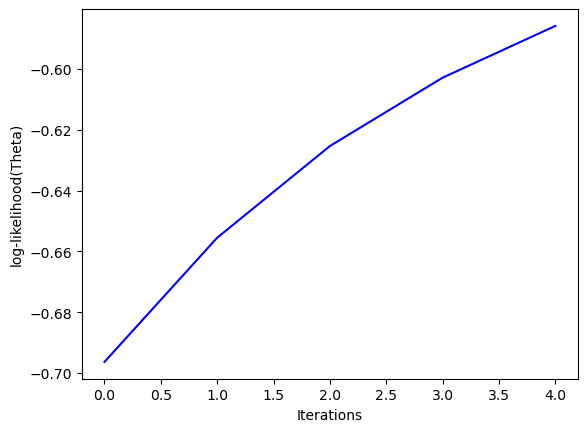

In [15]:
np.random.seed(1)

# Initialize the model
lowNSteps_model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 5
another_log, _ = fit(lowNSteps_model, X, y, lr=0.5, num_steps=n_iter)

plt.plot(range(len(another_log)), another_log, "b")

plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")
plt.show()

Briefly, well-tuned hyperparameters are essential for establishing an effective decision boundary that accurately separates the classes. Conversely, poorly balanced hyperparameters can result in suboptimal or unstable boundaries, adversely affecting the model's predictive performance.

Below, we can see effect of unbalanced hyperparams.

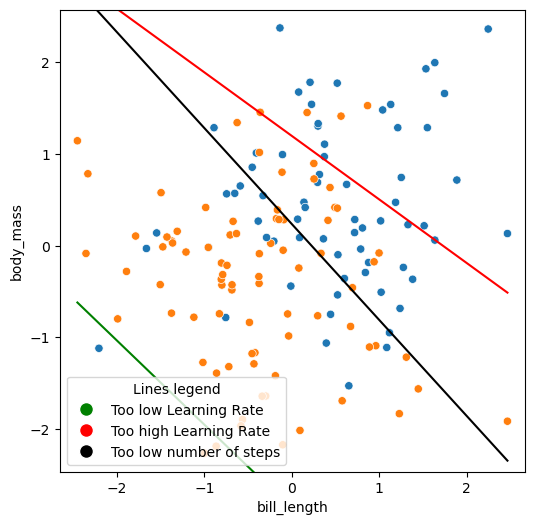

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)

theta_high_lr = highLR_model.parameters
y__highLR_range = -(theta_high_lr[0] + theta_high_lr[1] * x_range) / theta_high_lr[2]
plt.plot(x_range, y__highLR_range, c="red")

theta_low_lr = lowLR_model.parameters
y__lowLR_range = -(theta_low_lr[0] + theta_low_lr[1] * x_range) / theta_low_lr[2]
plt.plot(x_range, y__lowLR_range, c="green")

theta_low_steps = lowNSteps_model.parameters
y__lowSteps_range = -(theta_low_steps[0] + theta_low_steps[1] * x_range) / theta_low_steps[2]
plt.plot(x_range, y__lowSteps_range, c="black")

# Add custom legends
plt.legend(title='Lines legend', loc='lower left', labels=['Too low Learning Rate', 'Too high Learning Rate', 'Too low number of steps'], handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10), plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)])

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

plt.show()

Accuracy of unbalanced models

In [17]:
accuracyLowSteps = ((lowNSteps_model.predict(X) > 0.5) == y).mean()
accuracyLowLR = ((lowLR_model.predict(X) > 0.5) == y).mean()
accuracyHighLR = ((highLR_model.predict(X) > 0.5) == y).mean()

print(f"Accuracy of low steps: {accuracyLowSteps}")
print(f"Accuracy of low LR: {accuracyLowLR}")
print(f"Accuracy of high LR: {accuracyHighLR}")

# assert accuracy > 0.6, "The accuracy is too low"

Accuracy of low steps: 0.7483443708609272
Accuracy of low LR: 0.45695364238410596
Accuracy of high LR: 0.6688741721854304


**Question 4.** <br>
*What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?*

**Answear 4.**

Without *normalization* or *feature scaling*, **larger features**, such as *body mass*, **can dominate smaller ones**. <br>

This can lead to **slow convergence** as the algorithm might take a longer time to reach the optimal solution or it can make the optimization process inefficient because the learning rate may need to be adjusted to account for the differing scales of the features.
Another issue that can arise is that gradients may become very large or very small, leading to difficulty in model training with either convergence failure or slow progress.

## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression** 

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

<Axes: >

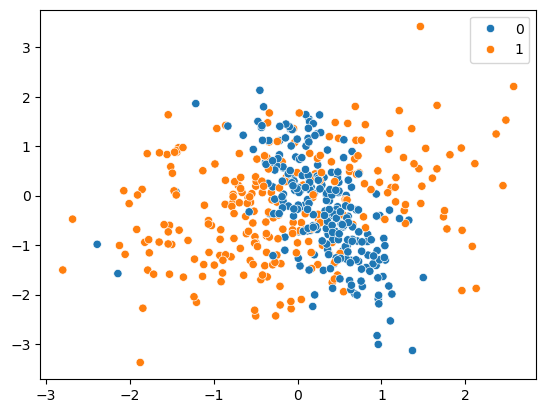

In [18]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [19]:
from itertools import combinations_with_replacement

def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features matrix of shape (n_samples, 3) where the first column is the bias term
        degree: the degree of the polynomial

    Returns:YOUR
        X: the final polynomial features
    """
    if degree < 2:
        return X

    features = np.ones(X.shape[0])

    #####################################################
    # Get and stack the components of X
    x1, x2 = X[:, 1], X[:, 2]
    new_features = np.column_stack((x1, x2))
    features = np.column_stack((features, new_features))
    # Get and stack the second degree features
    x11, x22, x12 = x1**2, x2**2, x1*x2
    new_features = np.column_stack((x11, x22, x12))
    features = np.column_stack((features, new_features))
    # If the degree is 2, return the computed features
    if degree < 3:
        return features
    # Get and stack the third degree features
    x111, x222, x112, x122 = x1**3, x2**3, x11*x2, x1*x22
    new_features = np.column_stack((x111, x222, x112, x122))
    features = np.column_stack((features, new_features))
    # If the degree is 3, return the new features
    if degree==3: 
        return features
    # Else, we should continue with the features, as this is required in a further question
    for deg in range(4, degree + 1):
        for combi in combinations_with_replacement([1,2], deg):
            new_features = np.ones(X.shape[0])
            for index in combi:
                new_features *= features[:, index]  # Multiply the selected features
            features = np.column_stack((features, new_features))  # Add new feature to the matrix
    #####################################################
    return features


**Do not write below this line just run it**

--------------------------------------------

In [20]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 1.0, 'Log Likelihood History for Different Models')]

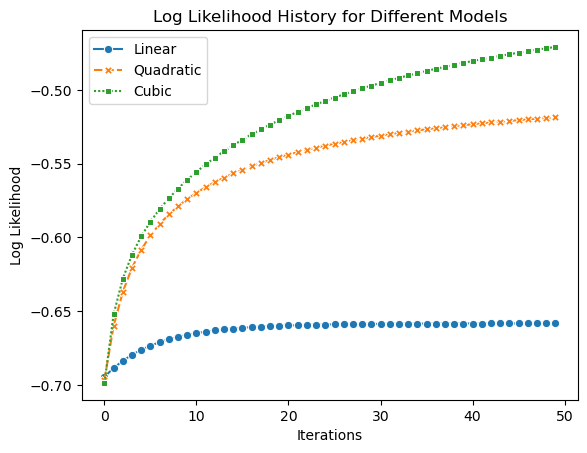

In [21]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary** 

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [22]:
from itertools import combinations_with_replacement
import numpy as np

def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree,
    manually assigning terms up to degree 3 and generalizing for higher degrees.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """
    # Check the degree and set the correct processing path
    if degree < 1:
        raise ValueError("Degree must be at least 1.")

    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)

    #####################################################
    # Initialize the function with the bias term
    f = np.zeros_like(x1_vec)
    theta_index = 0

    # Bias term
    f += theta_final[theta_index]
    theta_index += 1

    # Linear terms for degree 1
    if degree >= 1:
        f += theta_final[theta_index] * x1_vec
        theta_index += 1
        f += theta_final[theta_index] * x2_vec
        theta_index += 1

    # Degree 2 terms
    if degree >= 2:
        f += theta_final[theta_index] * x1_vec**2
        theta_index += 1
        f += theta_final[theta_index] * x2_vec**2
        theta_index += 1
        f += theta_final[theta_index] * x1_vec * x2_vec
        theta_index += 1

    # Degree 3 terms
    if degree >= 3:
        f += theta_final[theta_index] * x1_vec**3
        theta_index += 1
        f += theta_final[theta_index] * x2_vec**3
        theta_index += 1
        f += theta_final[theta_index] * x1_vec**2 * x2_vec
        theta_index += 1
        f += theta_final[theta_index] * x1_vec * x2_vec**2
        theta_index += 1

    # Terms for degree > 3
    if degree > 3:
        for deg in range(4, degree + 1):
            for combi in combinations_with_replacement([1, 2], deg):
                new_term = np.ones_like(x1_vec)
                for index in combi:
                    if index == 1:
                        new_term *= x1_vec
                    elif index == 2:
                        new_term *= x2_vec
                f += theta_final[theta_index] * new_term
                theta_index += 1
    #####################################################

    return x1_vec, x2_vec, f


Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

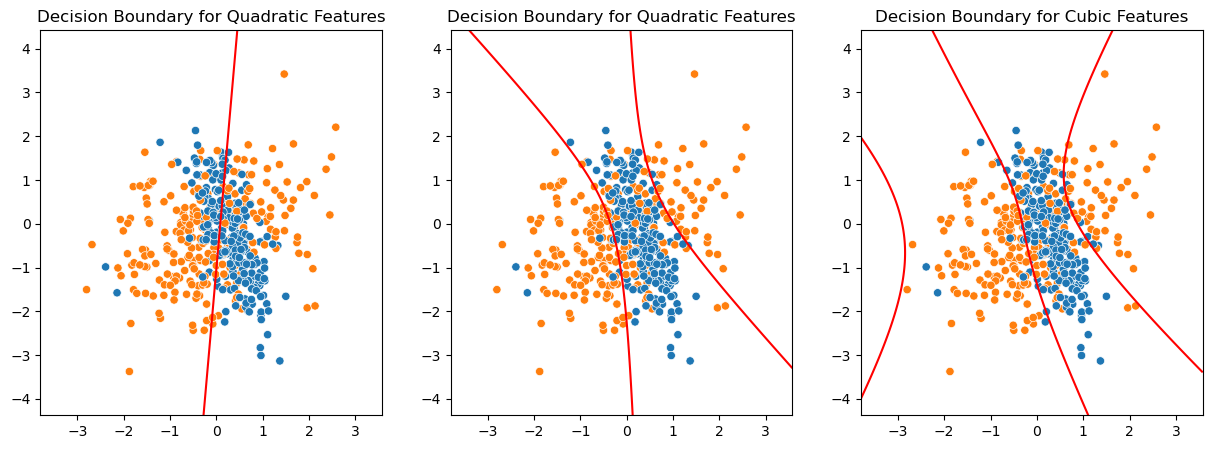

In [23]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)
    plt.contour(
        # x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]        
        x1_vec, x2_vec, f, colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features");

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [24]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        x_new = get_polynomial(X, degree=degree)

        model = architecture(num_features=x_new.shape[1])
        fit(model, x_new, y, lr=lr, num_steps=num_steps)    

        thetas.append(model.parameters)
        y_hat_train = model.predict(x_new) > 0.5
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))
        
    return thetas, accuracy_scores_train, accuracy_scores_test

100%|██████████| 19/19 [00:01<00:00, 14.65it/s]


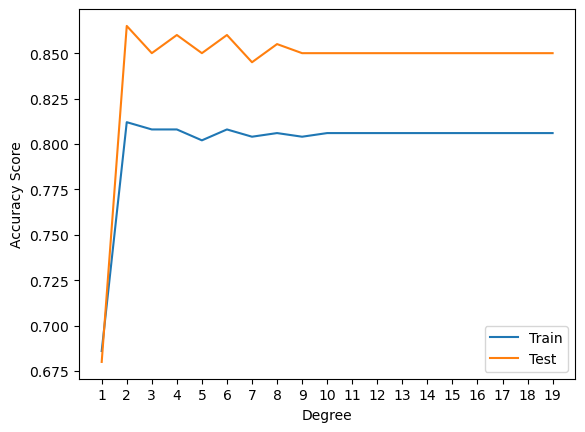

In [25]:
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

c:\Users\Leonardo\Desktop\FDS-HomeWorks\Homework02\libs\math.py:15: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


Accuracy of worst model (degree = 7) is 0.845


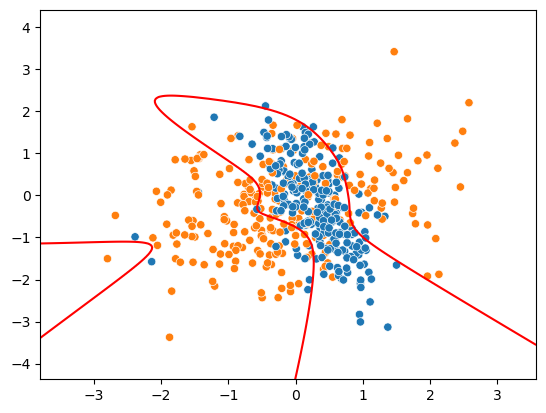

In [26]:
# Plot worst model

# Search for worst index (+1 because we do not consider poly of grade 0 
#                        and +1 because we start from 0 index which correspond to degree = 1)
worstIndex = np.argmin(accuracy_scores_test[1:]) + 2

# Construct polynomial for given degree
x_worst = get_polynomial(X, degree=worstIndex)

worstModel = LogisticRegression(num_features=x_worst.shape[1])
log_history,_ = fit(worstModel, x_worst, y, lr=0.5, num_steps=50)

theta_final = worstModel.parameters

# Plot decision boundary by final params and degree of worst model
plot_boundary_function(X, y, theta_final, degree=worstIndex)

print(f"Accuracy of worst model (degree = {worstIndex}) is {accuracy_scores_test[worstIndex - 1]}")

Accuracy of best model (degree = 2) is 0.865


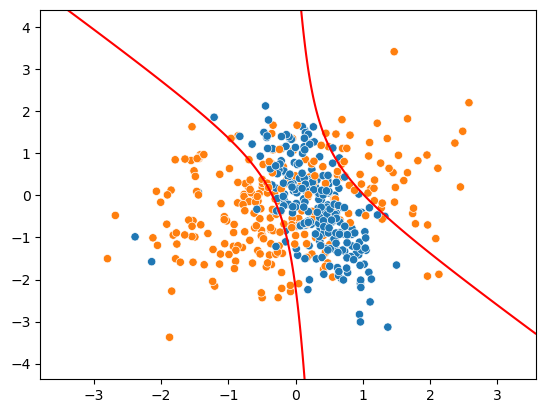

In [27]:
# Plot best model

# Search for best index (+1 because we do not consider poly of grade 0 
#                        and +1 because we start from 0 index which correspond to degree = 1)
bestIndex = np.argmax(accuracy_scores_test[1:]) + 2

# Construct polynomial for given degree
x_best = get_polynomial(X, degree=bestIndex)

bestModel = LogisticRegression(num_features=x_best.shape[1])
log_history,_ = fit(bestModel, x_best, y, lr=0.5, num_steps=50)

theta_final = bestModel.parameters

# Plot decision boundary by final params and degree of worst model
plot_boundary_function(X, y, theta_final, degree=bestIndex)

print(f"Accuracy of best model (degree = {bestIndex}) is {accuracy_scores_test[bestIndex - 1]}")

#### **Report** 
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


**WRITE YOUR ANSWER HERE:**

**1.** About these 3 questions:

**1.1** About linear, quadratic and cubic plots we can say that

- *Linear*: Straight line, accuracies for training and test set are both around 0.68 so linear model doesn't fit data well.
- *Quadratic*: Curved lines that fit the dataset well, accuracy on test set is the best among the other polynomials. 
- *Cubic*: More pronunced curves, from accuracy we can say that cubic model is becoming to complex and learning too much from training set. Matter of fact, accuracy on test set decrease, this is a syntom of overfitting.

**1.2** Model is improving from linear (degree = 1) to quadratic (degree = 2), where it achieves best bias-variance tradeoff, but increasing the polynomial degree, so incresing the model complexity, leads the model to memorize the training set resulting in bad performance in test set. This is a clear symptom of overfitting.

**1.3** No, **we can't incur in underfitting** because when degree increase, model memorizes more and more the training data and lose the ability to generalize new data. This is evident from the decreasing accuracy on the test set, a symptom of **overfitting**. 

<br>

**2.** About these questions:

**2.1** When plotting the accuracy of polynomial regression on the training and test sets as the degree of the polynomial increases, we observe a typical pattern. Accuracy peaks at degree 2, indicating the optimal balance between bias and variance, where the model fits the data well while maintaining good generalization. As the degree increases further, the training accuracy remains high due to the model memorizing the training data, while the test accuracy starts to decline, signaling overfitting.

**2.2** The difference in test accuracy between the best model (degree = 2, accuracy = 0.865) and the worst model (degree = 7, accuracy = 0.845) is relatively small, only 0.02. This indicates that while the model of degree 7 exhibits some overfitting, it is not drastically worse than the optimal model in terms of generalization. <br>
This suggests that the dataset likely has limited noise and that even higher-degree models are still capturing meaningful patterns to some extent, though with diminishing returns.

**2.3** No usually is not desirable to have a very complext decision boundary because, as we said, model learn the training set but, at the same time, perform poorly in test set, so is desiderable to balance polynomial complexity.

<br>

**3.** Some properties that may lead to overfitting are:

- High noise levels, such as random error or irrelevant features, this may lead model to learn wrong patterns and consequently may cause overfitting.
- Small dataset size, model has few example to learn from increasing the risk to be not very complex, leading to underfitting on new data or to learn the easily the training dataset, leading to overfitting.
- Unnormalized data, can make the model focus disproportionately on features with larger magnitudes, leading to poor generalization and overfitting.

-------------------------------------------------------

### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization. 

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) ) = \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \lambda\theta_{j} ) 
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [28]:
from libs.models import LogisticRegressionPenalized

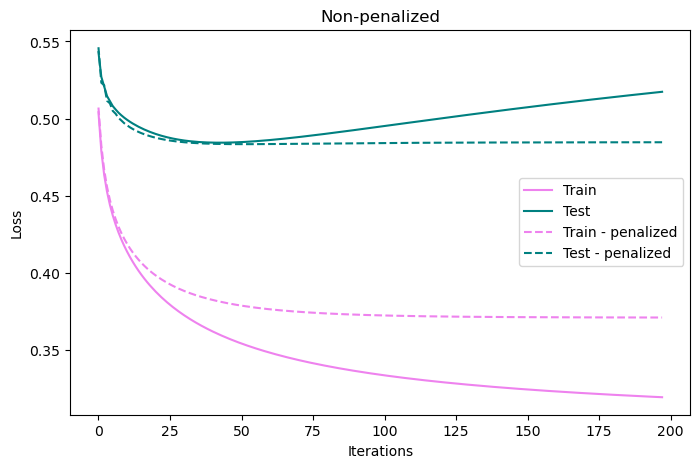

In [29]:
X,y = make_classification(
    n_samples=500, 
    n_features=100, 
    n_informative=50, 
    n_redundant=25, 
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
np.random.seed(42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best: 

Best lambda: 1.4


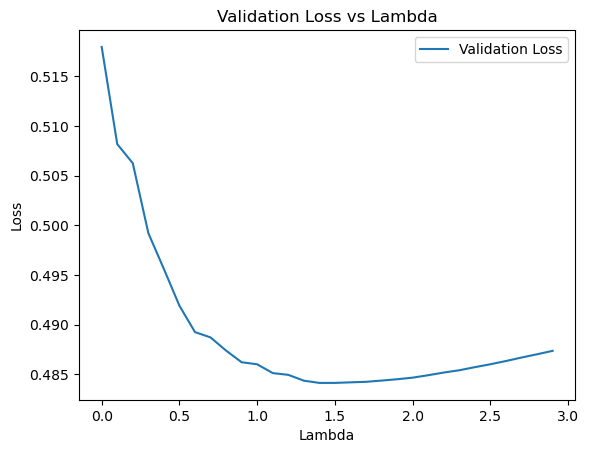

In [30]:
lambdas = np.arange(0, 3, 0.1)
losses = []

for lambda_ in lambdas:
    ##############################################
    penalized_lt = LogisticRegressionPenalized(X.shape[1], lambda_)
    pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

    losses.append(pen_val_history[-1])
    ##############################################

if len(losses) > 0:
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss").set(
        xlabel="Lambda", ylabel="Loss", title="Validation Loss vs Lambda"
    )
    print(f"Best lambda: {lambdas[np.argmin(losses)]:.1f}")

#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?

-------------------------------------------------------

**WRITE YOUR ANSWER HERE:**

1. When using non-penalized logistic regression, model learns more and more the training set which leads to overfitting. <br>
Matter of fact, while the training loss continues to decrease with each iteration, the test loss increase, a clear symptom of overfitting. <br>

2. The training loss is consistently lower for unpenalized regression because, without penalization, the model can continue to learn and adapt to the training data, increasing its complexity with each iteration. This often leads to overfitting, as seen from the increase in test loss. As the model becomes more complex, it loses its ability to generalize to new data in the test set. <br>

3.  The convergence rate refers to how quickly the model learns from the data and approaches the optimal solution, in this case, how fast the model minimizes the loss function. <br>
The convergence rate is influenced by the penalty terms, which are proportional to the size of the model parameters. These penalties encourage the model to keep the parameters small, reducing the risk of overfitting. While the penalty term can slow down convergence by adding a constraint, it makes the process more stable by preventing large updates and oscillations in the parameter values.

-------------------------------------------------------

## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

If we denote with $f(x^{(i)})$ the **softmax function** applied to the input features $x^{(i)}$, then:
\begin{align*}
L(\theta) = -\sum_{i}^{n} y^{(i)}\log(f(x^{(i)}))
\end{align*}

\begin{align*}
Loss(\theta) = - \frac{1}{n} \sum_{i}^{n} \sum_{j}^{k} y^{(i)}\log(f(x^{(i)}))_{j}
\end{align*}


\begin{align*}
\nabla_{\theta_k} L(\theta) = \frac{\partial L(\theta_{k})}{\partial \theta_{k}} = \frac{1}{n} \sum_{i=1}^{n} \left( f(x^{(i)})_k - y_k^{(i)} \right) x^{(i)}
\end{align*}


### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [31]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [32]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [33]:
# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations, show=True)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training Progress: 100%|██████████| 500/500 [02:07<00:00,  3.92it/s]

Training accuracy: 36.99%
Test accuracy: 36.54%


### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [34]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [35]:
numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

##############################################
###          FILL IN THIS CODE           #####
##############################################
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
## Import everything you need here
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

numeric_transformer = make_pipeline(
    # Impute missing values with the mean
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    # Add polynomial features (degree 3)
    PolynomialFeatures(degree=3, interaction_only=False, include_bias=False),
    # Scale features to mean=0 and std=1
    StandardScaler()
)

categoric_transformer = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    OneHotEncoder(drop='if_binary', handle_unknown='error')
)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categoric_transformer, categorical_cols)
], remainder='drop')

pipe = make_pipeline(
    preprocessor,  
    KNeighborsClassifier(n_neighbors=4)  
)
if len(pipe.named_steps)>0:
    display(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length', 'bill_depth',
                                                   'flipper_length',
                                                   'body_mass']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['island', 'sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [36]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.71      0.75      0.73        20
   Chinstrap       0.71      0.56      0.62         9
      Gentoo       0.62      0.67      0.64        12

    accuracy                           0.68        41
   macro avg       0.68      0.66      0.67        41
weighted avg       0.69      0.68      0.68        41



This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters: 

In [37]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

columntransformer__remainder: drop
columntransformer__sparse_threshold: 0.3
columntransformer__num__simpleimputer__missing_values: nan
columntransformer__num__simpleimputer__strategy: mean
columntransformer__num__polynomialfeatures__degree: 3
columntransformer__num__polynomialfeatures__order: C
columntransformer__cat__simpleimputer__missing_values: nan
columntransformer__cat__simpleimputer__strategy: most_frequent
columntransformer__cat__onehotencoder__categories: auto
columntransformer__cat__onehotencoder__drop: if_binary
columntransformer__cat__onehotencoder__feature_name_combiner: concat
columntransformer__cat__onehotencoder__handle_unknown: error
kneighborsclassifier__algorithm: auto
kneighborsclassifier__leaf_size: 30
kneighborsclassifier__metric: minkowski
kneighborsclassifier__n_neighbors: 4
kneighborsclassifier__p: 2
kneighborsclassifier__weights: uniform


Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [39]:
from sklearn.model_selection import GridSearchCV

grid = {
    'columntransformer__num__polynomialfeatures__degree': [1, 4, 7, 10],
    'kneighborsclassifier__n_neighbors': [3, 6, 9, 12, 15, 18, 21],
    'columntransformer__cat__onehotencoder__drop': ['if_binary', 'first'],
    'kneighborsclassifier__algorithm': ['kd_tree', 'brute'],
}

pipe_cv = GridSearchCV(pipe, grid, cv=7, n_jobs=-1, verbose=1)
if pipe_cv is not None:

    pipe_cv.fit(X_train, y_train)

    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

Fitting 7 folds for each of 112 candidates, totalling 784 fits
Best score: 0.8012422360248447
columntransformer__cat__onehotencoder__drop: if_binary
columntransformer__num__polynomialfeatures__degree: 1
kneighborsclassifier__algorithm: kd_tree
kneighborsclassifier__n_neighbors: 18


`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [40]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.81      0.65      0.72        20
   Chinstrap       0.78      0.78      0.78         9
      Gentoo       0.69      0.92      0.79        12

    accuracy                           0.76        41
   macro avg       0.76      0.78      0.76        41
weighted avg       0.77      0.76      0.75        41



#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

--------------------------------------------
### 1. How many combinations has your gridsearch tried?

In [41]:
cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]

##############################################
print(f'Combinations number: {cv_res.shape[0]}')
##############################################

Combinations number: 112


### 2. Make a plot with the results of your hyperparameter grid

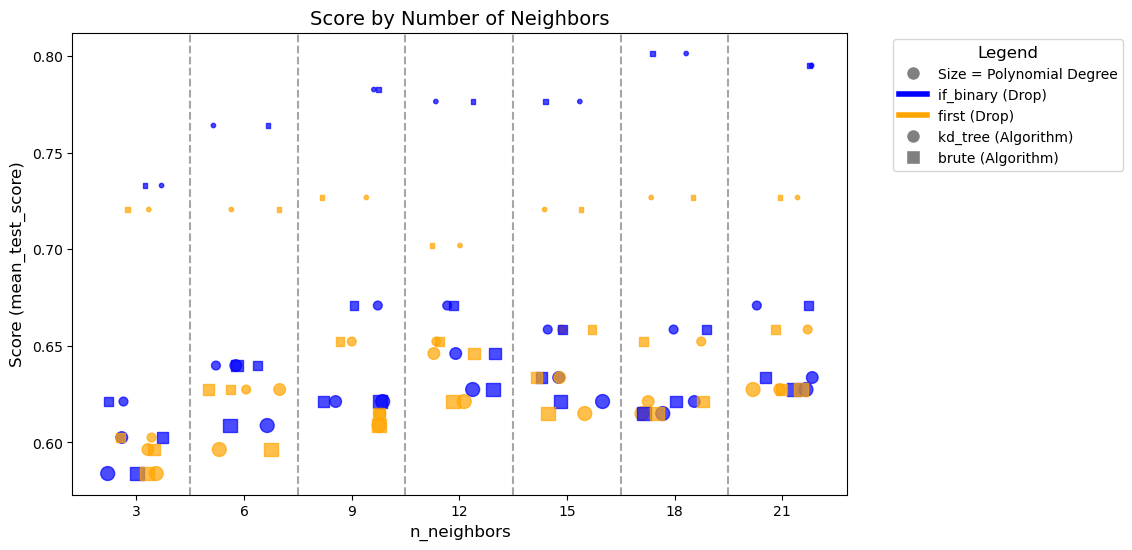

In [42]:
from matplotlib.lines import Line2D


# Map colors and markers
colors = {'if_binary': 'blue', 'first': 'orange'}
markers = {'kd_tree': 'o', 'brute': 's'}

# Get unique values of n_neighbors
discrete_neighbors = sorted(cv_res['n_neighbors'].unique())
jitter_strength = 1. 

# Plot
plt.figure(figsize=(10, 6))

# Add vertical lines for the midpoints between consecutive unique neighbors
for i in range(len(discrete_neighbors) - 1):
    midpoint = (discrete_neighbors[i] + discrete_neighbors[i + 1]) / 2
    plt.axvline(x=midpoint, color='gray', linestyle='--', alpha=0.7)  # Vertical dashed lines at midpoints

# Scatter plot for each combination of algorithm and drop
for algo in markers.keys():
    for drop in colors.keys():
        subset = cv_res[(cv_res['drop'] == drop) & (cv_res['algorithm'] == algo)]
        # Add jitter to the n_neighbors
        jittered_neighbors = subset['n_neighbors'] + np.random.uniform(
            -jitter_strength, jitter_strength, size=len(subset)
        )
        
        # Size of points mapped to polynomial_degree
        sizes = subset['degree'].astype(float) * 10  # Scale the sizes accordingly

        plt.scatter(
            jittered_neighbors,
            subset['mean_test_score'],
            s=sizes,  # Size based on polynomial_degree
            c=colors[drop],
            marker=markers[algo],
            label=f"{drop} (Drop) - {algo} (Algorithm)",
            alpha=0.7,
        )

plt.title('Score by Number of Neighbors', fontsize=14)
plt.xlabel('n_neighbors', fontsize=12)
plt.ylabel('Score (mean_test_score)', fontsize=12)
plt.xticks(discrete_neighbors)
plt.grid(False)

drop_legend = [Line2D([0], [0], color=colors[drop], lw=4, label=f"{drop} (Drop)") for drop in colors]
algo_legend = [Line2D([0], [0], marker=markers[algo], color='w', markerfacecolor='gray', markersize=10, label=f"{algo} (Algorithm)") for algo in markers]
size_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Size = Polynomial Degree')]
legend = size_legend + drop_legend + algo_legend
plt.legend(handles=legend,
           title='Legend', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### 3. Do you notice any trend in the performance of certain hyperparameters?
- **Number of Neighbors**: The number of neighbors appears to influence the model's performance, particularly when it increases from 3 to 9 neighbors. After this point, the performance seems to plateau. This could be due to the relatively small size of the dataset, where adding more neighbors doesn't contribute significantly to improving the model's accuracy. As the model becomes more complex with more neighbors, the benefit diminishes because the limited amount of data doesn't support further improvements from additional neighbors.
- **Polynomial Degree**: For each fixed number of neighbors, there are distinct clusters of smaller markers corresponding to algorithms with a polynomial degree of 1. These clusters consistently show better performance compared to algorithms with higher polynomial degrees. This is understandable given the nature of the dataset (penguin dataset), which likely doesn't require the added complexity of polynomial features for accurate predictions. In fact, higher polynomial degrees (such as squares and beyond) can lead to overfitting, where the model becomes too sensitive to noise in the data. A lower degree, such as 1, provides just enough flexibility to capture the underlying trends in the data without introducing unnecessary complexity.
- **Impact of One-Hot Encoder Drop**: Among the algorithms with a polynomial degree of 1, the models using the `if_binary` one-hot encoder (denoted by blue markers) tend to perform better than those using the `first` encoder (denoted by yellow markers). This could be due to the way these encoders handle categorical variables. The if_binary encoder likely better captures the relationships between categorical features and the target variable by creating binary features, which may be more effective for the specific structure of this dataset. On the other hand, the first encoder, which may drop one category for each feature, might lead to information loss and result in lower performance for this particular case.
- **Algorithm Choice**: The choice of algorithm does not appear to significantly affect the model's performance across different configurations. Whether using `kd_tree` or `brute`, the performance metrics seem fairly consistent, suggesting that the dataset's characteristics—such as size or complexity—may not require a specific algorithm to perform better. 


### 4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.

In [ ]:
# Evaluate accuracy on validation set
y_pred_val = pipe_cv.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy on Validation Set: {val_accuracy:.4f}")

# Evaluate accuracy on training set
y_pred_train = pipe_cv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on Training Set: {train_accuracy:.4f}")

Accuracy on Validation Set: 0.7561
Accuracy on Training Set: 0.8137


The slightly lower accuracy on the validation set compared to the training set is likely due to overfitting. In K-Nearest Neighbors (K-NN), when the number of neighbors (k) is small (in our case 18), the model can become somewhat sensitive to the training data, capturing noise or irrelevant patterns that do not generalize well to unseen data. While GridSearchCV uses cross-validation to select the best hyperparameters, the configuration that performs best on the training data might not necessarily translate to the best performance on the validation set, especially if the model has a tendency to overfit to the training data. Additionally, the relatively small size of the dataset can amplify this issue, as there is less data for the model to learn from, leading to higher variance between training and validation performance. However, given the relatively small difference in accuracy (around 5%), the overfitting effect seems to be relatively mild in this case.

### 5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

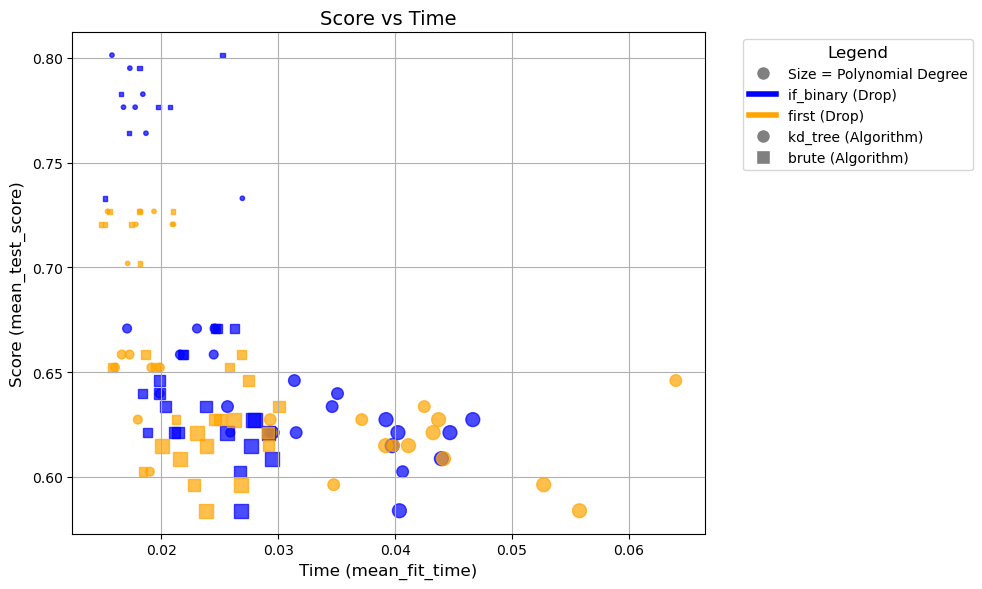

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for each combination of algorithm and drop method
for algo in markers.keys():
    for drop in colors.keys():
        drop_algo_subset = cv_res[(cv_res['drop'] == drop) & (cv_res['algorithm'] == algo)]

        if not drop_algo_subset.empty:
            # Size of points mapped to polynomial_degree
            sizes = drop_algo_subset['degree'].astype(float) * 10  # Scale the sizes accordingly

            plt.scatter(
                drop_algo_subset['mean_fit_time'],  # X-axis: Time (Mean Fit Time)
                drop_algo_subset['mean_test_score'],  # Y-axis: Accuracy (Mean Test Score)
                s=sizes,  # Size based on polynomial_degree
                c=colors[drop],
                marker=markers[algo],
                label=f"{drop} - {algo}",
                alpha=0.7,
            )

# Set plot labels and title
plt.title('Score vs Time', fontsize=14)
plt.xlabel('Time (mean_fit_time)', fontsize=12)
plt.ylabel('Score (mean_test_score)', fontsize=12)
plt.grid(True)

# Add the legend outside the plot
plt.legend(handles=legend, 
           title='Legend', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

From the plot, it's clear that both the score (used here as a measure of accuracy) and computational efficiency tend to decrease as the polynomial degree increases (reflected by the growing marker sizes). To explore this further, let's examine the relationship by plotting the mean score and mean fit time for each polynomial degree.

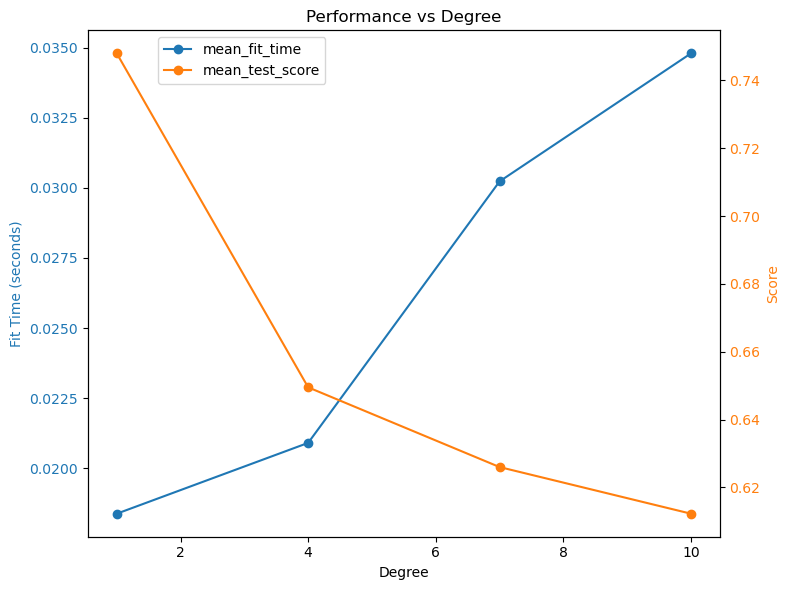

In [ ]:
# Group by degree and calculate the mean for fit_time and test_score
grouped_data = cv_res.groupby('degree').agg(
    mean_fit_time=('mean_fit_time', 'mean'),
    mean_test_score=('mean_test_score', 'mean')
).reset_index()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot mean_fit_time on the first y-axis
ax1.plot(grouped_data['degree'], grouped_data['mean_fit_time'], 'o-', color='tab:blue', label='mean_fit_time')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Fit Time (seconds)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for mean_test_score
ax2 = ax1.twinx()  
ax2.plot(grouped_data['degree'], grouped_data['mean_test_score'], 'o-', color='tab:orange', label='mean_test_score')
ax2.set_ylabel('Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set title
ax1.set_title('Performance vs Degree')

# Add a legend for both y-axes
fig.tight_layout()  
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1), bbox_transform=ax1.transAxes)

plt.show()

The plot clearly shows that increasing the polynomial degree leads to a significant drop in both accuracy and computational efficiency. This suggests that higher-degree polynomial models are overfitting the data or introducing unnecessary complexity, which negatively impacts performance. In this case, it would be beneficial to avoid using high polynomial degrees and focus on simpler models for better generalization and efficiency.

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [ ]:
# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#####################################################

# Compute sizes for train and validation datasets
train_size = int(len(full_train_dataset) * 0.8)
val_size = len(full_train_dataset) - train_size

# Set seed for reproducibility
torch.manual_seed(42)

# Split the dataset into training and validation datasets
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Create DataLoaders for training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print the sizes of each dataset
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
#####################################################

Files already downloaded and verified
Files already downloaded and verified
Training dataset size: 40000
Validation dataset size: 10000
Test dataset size: 10000


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [ ]:
from libs.models import PoorPerformingCNN

pnet = PoorPerformingCNN()

Loss Function and optimizer

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pnet.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [ ]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

torch.manual_seed(42)

num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0
    correct = 0
    total = 0

    # Training Phase
    pnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = pnet(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Get the predicted class
        _, y_pred = torch.max(outputs, 1)

        # Accumulate correct predictions and total samples
        correct += (y_pred == labels).sum().item()
        total += labels.size(0)

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################
    
    # Calculate average loss for the training epoch
    avg_train_loss = running_loss/total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    train_accuracy = correct/total
    train_accuracies.append(train_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Validation Phase
    pnet.eval()
    val_running_loss = 0.0
    total_batches = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = pnet(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            total_batches += 1

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()


    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / total_batches
    val_losses.append(avg_val_loss)

    # Calculate validation accuracy
    val_accuracy = correct/total
    val_accuracies.append(val_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 1.8966, Training Accuracy: 0.3295
Epoch 1, Average Validation Loss: 1.7410, Validation Accuracy: 0.3812
Epoch 2, Average Training Loss: 1.6247, Training Accuracy: 0.4320
Epoch 2, Average Validation Loss: 1.5250, Validation Accuracy: 0.4621
Epoch 3, Average Training Loss: 1.4826, Training Accuracy: 0.4778
Epoch 3, Average Validation Loss: 1.4605, Validation Accuracy: 0.4936
Epoch 4, Average Training Loss: 1.4179, Training Accuracy: 0.5030
Epoch 4, Average Validation Loss: 1.4101, Validation Accuracy: 0.5079
Epoch 5, Average Training Loss: 1.3770, Training Accuracy: 0.5187
Epoch 5, Average Validation Loss: 1.3645, Validation Accuracy: 0.5275
Epoch 6, Average Training Loss: 1.3375, Training Accuracy: 0.5345
Epoch 6, Average Validation Loss: 1.3424, Validation Accuracy: 0.5319
Epoch 7, Average Training Loss: 1.3089, Training Accuracy: 0.5433
Epoch 7, Average Validation Loss: 1.3161, Validation Accuracy: 0.5434
Epoch 8, Average Training Loss: 1.2869, Training

### 4.4: Evaluate

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = pnet(images)
        _, predicted = torch.max(outputs.data, 1)
        #####################################################
        ##              YOUR CODE HERE                     ##
        #####################################################

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #####################################################
        ##              END OF YOUR CODE                   ##
        #####################################################

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 54.53%


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**


**1. What challenges can class imbalance introduce when training a machine learning model?**  
- **Bias in predictions**: The model tends to favor the majority class, often ignoring the minority class.  
- **Poor generalization**: The model may perform well on the majority class but poorly on the minority class, reducing its overall utility.  
- **Misleading performance metrics**: Metrics like accuracy can be inflated as the model might classify most inputs as the majority class.  
- **Difficult optimization**: Loss functions may become biased, leading to a suboptimal decision boundary that favors the majority class.

**2. What are some strategies to address class imbalance in your dataset or training process?**  

- **Resampling techniques**:  
  - **Oversampling** the minority class (e.g., SMOTE, which is also a data augmentation technique).  
  - **Undersampling** the majority class.  

- **Class weighting**: Assign higher weights to minority classes in the loss function (e.g., using the `weight` parameter in `CrossEntropyLoss`).  

- **Data augmentation**: Create synthetic samples of the minority class to balance the dataset (e.g., SMOTE or random transformations like rotation, flipping, etc.).

- **Loss function adjustment**:  
  - Use **weighted loss functions** to penalize misclassification of minority classes more heavily.  
  - Apply **focal loss** to focus on hard-to-classify samples.  

- **Alternative metrics for evaluation**:  
  - Use metrics like **F1 score**, **precision-recall**, or **AUC-ROC** for a more comprehensive evaluation of the model's performance.  
  - These metrics do not directly affect the training process but provide better insights into the model's behavior, especially in imbalanced scenarios.

  **Note**: While metrics like F1 score or AUC-ROC do not influence training, adjustments to the **loss function** (e.g., weighted cross-entropy) or **data preprocessing** (e.g., oversampling) can indirectly improve these metrics during evaluation.


**3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance?**  
- Accuracy measures the proportion of correct predictions without considering class distribution. In an imbalanced dataset, a model can achieve high accuracy by predicting only the majority class and ignoring the minority class.  
- For example, in a dataset where 90% of the samples belong to one class, predicting everything as the majority class yields 90% accuracy but fails to recognize the minority class altogether.  

**4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.**
- As we can see from the plot below, the CIFAR-10 dataset is a perfectly balanced dataset. For this reason, accuracy can be used as a valid performance metric in this case, as the class distribution does not introduce bias in the evaluation.

-------------------------------------------------------

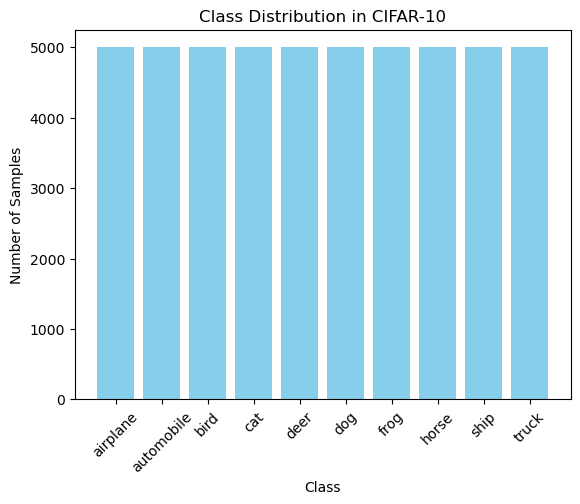

In [ ]:
from collections import Counter

labels = full_train_dataset.targets

# Count the occurrences of each class
class_counts = Counter(labels)

class_counts_ordered = [class_counts[i] for i in range(10)]

# Define class names
class_names = [
    "airplane", "automobile", "bird", "cat", 
    "deer", "dog", "frog", "horse", "ship", "truck"
]

# Plot the class distribution
plt.bar(class_names, class_counts_ordered, color="skyblue")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in CIFAR-10")
plt.xticks(rotation=45)
plt.show()


## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Set seed for reproducibility
torch.manual_seed(42)

# Create data loaders
batch_size = 256
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [ ]:
from libs.models import CustomCNN

net = CustomCNN().to(device)

#### Training

In [ ]:
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Set seed for reproducibility
torch.manual_seed(42)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Initialize a progress bar
    progress_bar = tqdm(total=50000, desc=f"Epoch {epoch + 1}")

    try:
        net.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update the progress bar
            progress_bar.update(inputs.size(0))
    finally:
        # Ensure the progress bar is properly closed even if interrupted
        progress_bar.close()

    print(f'\t Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

Epoch 1: 100%|██████████| 50000/50000 [00:35<00:00, 1425.74it/s]


	 Loss: 1.4306


Epoch 2: 100%|██████████| 50000/50000 [00:36<00:00, 1384.36it/s]


	 Loss: 1.0835


Epoch 3: 100%|██████████| 50000/50000 [00:36<00:00, 1378.18it/s]


	 Loss: 0.9519


Epoch 4: 100%|██████████| 50000/50000 [00:39<00:00, 1251.50it/s]


	 Loss: 0.8800


Epoch 5: 100%|██████████| 50000/50000 [00:38<00:00, 1290.82it/s]


	 Loss: 0.8290


Epoch 6: 100%|██████████| 50000/50000 [00:35<00:00, 1392.89it/s]


	 Loss: 0.7780


Epoch 7: 100%|██████████| 50000/50000 [00:36<00:00, 1372.17it/s]


	 Loss: 0.7394


Epoch 8: 100%|██████████| 50000/50000 [00:37<00:00, 1346.74it/s]


	 Loss: 0.7088


Epoch 9: 100%|██████████| 50000/50000 [00:37<00:00, 1337.34it/s]


	 Loss: 0.6803


Epoch 10: 100%|██████████| 50000/50000 [00:35<00:00, 1413.18it/s]

	 Loss: 0.6512
Finished Training


#### Evaluation

In [ ]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 76.14%



### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#####################################################
##              YOUR CODE HERE                     ##
#####################################################

# The device is already defined in section 4
model = models.alexnet(pretrained=True).to(device)

# Modify the final fully connected layer to output 10 classes
model.classifier[6] = nn.Linear(in_features=4096, out_features=10)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final fully connected layer so it can be fine-tuned
for param in model.classifier[6].parameters():
    param.requires_grad = True


#####################################################
##              END OF YOUR CODE                   ##
#####################################################
model = model.to(device)

c:\Users\Leonardo\anaconda3\envs\New_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Leonardo\anaconda3\envs\New_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    # Set up a progress bar to monitor performance
    progress_bar = tqdm(total=50000, desc=f"Epoch {epoch + 1} - Processing Images")

    try:
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update the progress bar
            progress_bar.update(batch_size)
    finally:
        # Ensure the progress bar is closed even if interrupted
        progress_bar.close()

    print(f'\tLoss: {running_loss / len(train_loader):.4f}')


# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}% \n')

Epoch 1 - Processing Images: 50048it [09:38, 86.55it/s]                           


	Loss: 0.7235
Accuracy on the test images: 80.64% 

